In [291]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import pi

# Austin Animal Shelter outcomes
## The dataset is provided by the Austin Animal Center, the largest no-kill animal shelter in the United States. Data were collected between October 1, 2013 through February 1, 2018, and is available on kaggle here: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and

In [356]:
path='C:\\Users\\ualbertin\\Documents\\Springboard\\AustinAnimalShelter\\'
os.chdir(path)
os.listdir()
df=pd.read_csv('aac_shelter_outcomes.csv')

## The information available includes the animal age, type, description and outcome.

In [298]:
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


# Almost all of the animals in the shelter are  dogs.

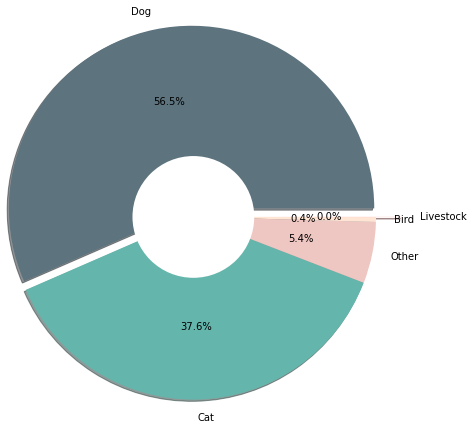

In [174]:
labels=df.animal_type.value_counts().index.to_list()
ax1.axis('equal')
colors = ['#5d737e','#64b6ac','#efc7c2','#ffe5d4','#ff6b6b']
plt.pie(animal, colors=colors,labels=labels,labeldistance=1.1,radius=2.1,shadow=True,explode = (0.1,0,0,0,0.3),autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# Out of the top 10 dog breeds, the most common is a Pit Bull Mix.

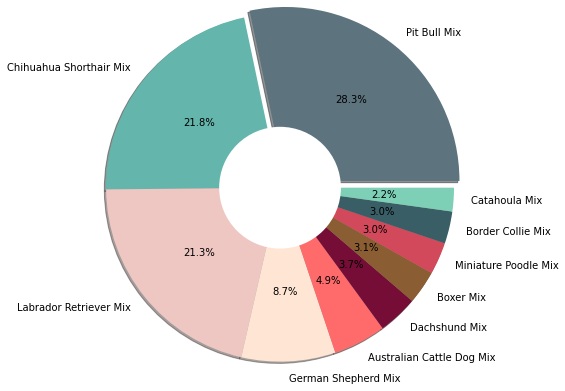

In [104]:
mcb=df[df['animal_type']=='Dog'].breed.value_counts()[:10]
labels=mcb.index.to_list()
ax1.axis('equal')
colors = ['#5d737e','#64b6ac','#efc7c2','#ffe5d4','#ff6b6b','#750d37','#8b5d33','#d1495b','#395e66','#7dcfb6']
plt.pie(mcb, colors=colors,labels=labels,labeldistance=1.1,radius=2,shadow=True,explode = (0.1,0,0,0,0,0,0,0,0,0),autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# Of the top five breeds, most all of the cats in the shelter are a domestic shorthair mix.

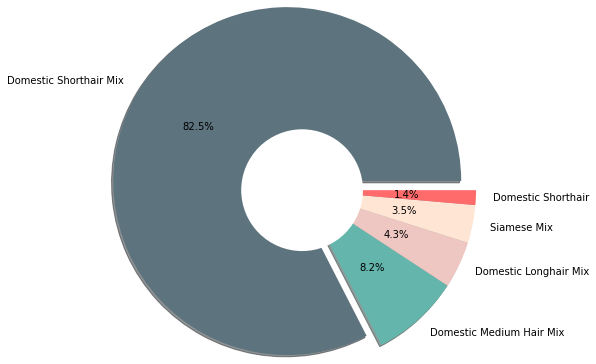

In [105]:
mcb=df[df['animal_type']=='Cat'].breed.value_counts()[:5]
labels=mcb.index.to_list()
ax1.axis('equal')
colors = ['#5d737e','#64b6ac','#efc7c2','#ffe5d4','#ff6b6b']
plt.pie(mcb, colors=colors,labels=labels,labeldistance=1.1,radius=2,shadow=True,explode = (0.2,0,0,0,0),autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# Most of the animals in the shelter were adopted.

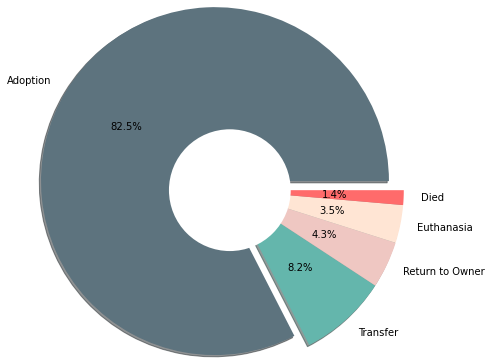

In [107]:
outcome=df.outcome_type.value_counts()[:5]
labels=outcome.index.to_list()
ax1.axis('equal')
colors = ['#5d737e','#64b6ac','#efc7c2','#ffe5d4','#ff6b6b']
plt.pie(mcb, colors=colors,labels=labels,labeldistance=1.1,radius=2,shadow=True,explode = (0.2,0,0,0,0),autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

## Most animals were adopted when they are between 1-5 years of age. For dogs and cats, the next largest group is at  1-3 months of age.

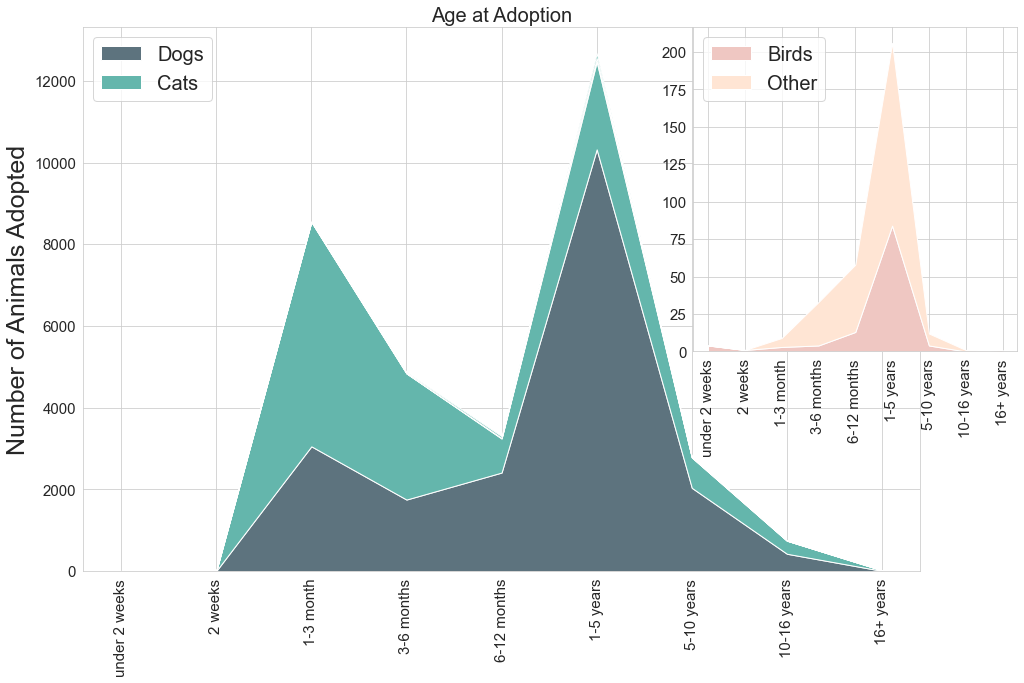

In [318]:
df['n_age_of_outcome']=pd.to_datetime(df.datetime)-pd.to_datetime(df.date_of_birth)
Adopt=df[df['outcome_type']=='Adoption']
Adopt = Adopt[Adopt['n_age_of_outcome'].dt.days > 0] #drop rows with negative ages
Agebins=['under 2 weeks','2 weeks','1-3 month','3-6 months','6-12 months','1-5 years','5-10 years','10-16 years','16+ years']
Agelist=[0,14,30,90,180,365,1825,3650,5840,10000]
Doglist=[]         
Catlist=[]
Otherlist=[]
Birdlist=[]
for i in range(1,10):
  Dog_sum=np.sum((Adopt['n_age_of_outcome'].dt.days>(Agelist[i-1])) \
                 & (Adopt['n_age_of_outcome'].dt.days<Agelist[i])\
                 & (Adopt['animal_type']=='Dog'))
  Doglist.append(Dog_sum)
  Cat_sum=np.sum((Adopt['n_age_of_outcome'].dt.days>(Agelist[i-1])) \
                 & (Adopt['n_age_of_outcome'].dt.days<Agelist[i])\
                 & (Adopt['animal_type']=='Cat'))
  Catlist.append(Cat_sum)
  Bird_sum=np.sum((Adopt['n_age_of_outcome'].dt.days>(Agelist[i-1])) \
                 & (Adopt['n_age_of_outcome'].dt.days<Agelist[i])\
                 & (Adopt['animal_type']=='Bird'))
  Birdlist.append(Bird_sum)
  Other_sum=np.sum((Adopt['n_age_of_outcome'].dt.days>(Agelist[i-1])) \
                 & (Adopt['n_age_of_outcome'].dt.days<Agelist[i])\
                 & (Adopt['animal_type']=='Other'))
  Otherlist.append(Other_sum)
fig, ax1 = plt.subplots(figsize=(15,10))
sns.set_style("whitegrid")
colors = ['#5d737e','#64b6ac']
plt.stackplot(Agebins,Doglist,Catlist,Birdlist,Otherlist,labels=['Dogs','Cats'],colors=colors)
plt.ylabel('Number of Animals Adopted', fontsize=25)
plt.title('Age at Adoption', fontsize=20)
ax1.xaxis.set_tick_params(rotation=90, labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
plt.legend(loc='upper left',prop={'size': 20})
left, bottom, width, height = [0.69, 0.43, 0.3, 0.45]
colors=['#efc7c2','#ffe5d4']
ax2 = fig.add_axes([left, bottom, width, height])
ax2.stackplot(Agebins,Birdlist,Otherlist,labels=['Birds','Other'],colors=colors)
ax2.xaxis.set_tick_params(rotation=90, labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
plt.legend(loc='upper left',prop={'size': 20})
plt.show()

## Among dogs, cats and birds, the majority of animals were euthanized because they were suffering.

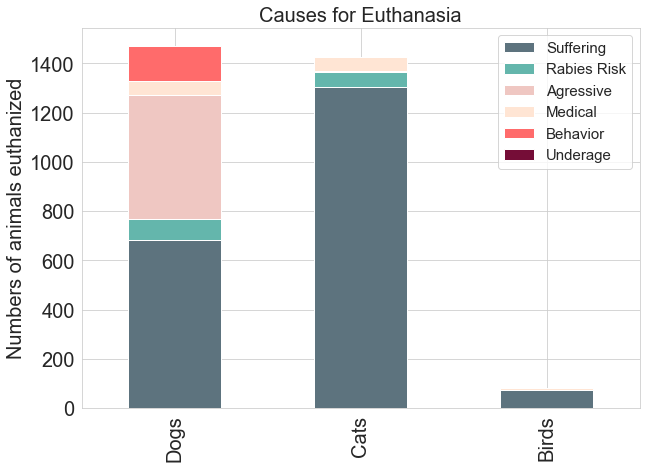

In [436]:
Euth=df[df['outcome_type']=='Euthanasia'] #Create a dataframe for euthanized animals
DEuth=Euth[Euth['animal_type']=='Dog'].outcome_subtype #dogs
CEuth=Euth[Euth['animal_type']=='Cat'].outcome_subtype #cats
BEuth=Euth[Euth['animal_type']=='Bird'].outcome_subtype #birds
df2 = pd.DataFrame({
'group': ['Dogs','Cats','Birds'],
'Suffering': [np.sum(DEuth=='Suffering'), np.sum(CEuth=='Suffering'), np.sum(BEuth=='Suffering')],
'Rabies Risk': [np.sum(DEuth=='Rabies Risk'), np.sum(CEuth=='Rabies Risk'), np.sum(BEuth=='Rabies Risk')],
'Agressive': [np.sum(DEuth=='Aggressive'), np.sum(CEuth=='Aggressive'), np.sum(BEuth=='Aggressive')],
'Medical': [np.sum(DEuth=='Medical'), np.sum(CEuth=='Medical'), np.sum(BEuth=='Medical')],
'Behavior': [np.sum(DEuth=='Behavior'), np.sum(CEuth=='Behavior'), np.sum(BEuth=='Behavior')],
'Underage': [np.sum(DEuth=='Underage'), np.sum(CEuth=='Underage'), np.sum(BEuth=='Underage')]
})
colors = ['#5d737e','#64b6ac','#efc7c2','#ffe5d4','#ff6b6b','#750d37']
df2.plot.bar(stacked=True, color=colors,figsize=(10,7)) #create a stacked bar plot
plt.legend(prop={'size': 15})
plt.title('Causes for Euthanasia',fontsize=20)
plt.xticks((0,1,2), ('Dogs', 'Cats', 'Birds'),fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Numbers of animals euthanized', fontsize=20)
plt.show()

## Of the dogs that were euthanized because of aggression, the overwhelming breed was either a Pit Bull or Pit Bull mix.

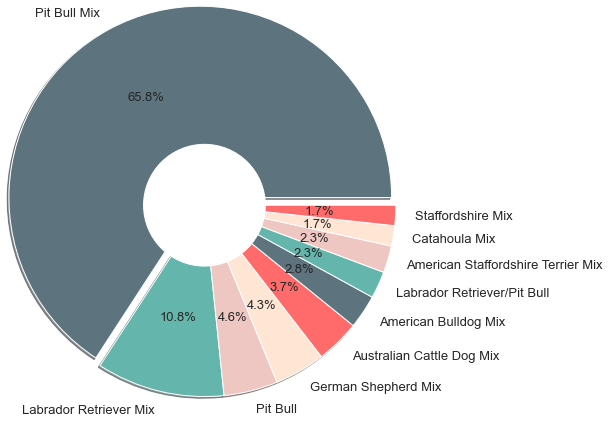

In [444]:
outcome=Euth[(Euth['animal_type']=='Dog') & (Euth['outcome_subtype']=='Aggressive')].breed.value_counts()[:10]
labels=outcome.index.to_list()
ax1.axis('equal')
colors = ['#5d737e','#64b6ac','#efc7c2','#ffe5d4','#ff6b6b']
plt.pie(outcome, textprops={"fontsize":13},colors=colors,labels=labels,labeldistance=1.1,radius=2.2,shadow=True,explode = (0.1,0,0,0,0,0,0,0,0,0),autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

## The majority of animals in the 'other' category were euthanized because of rabies risk.

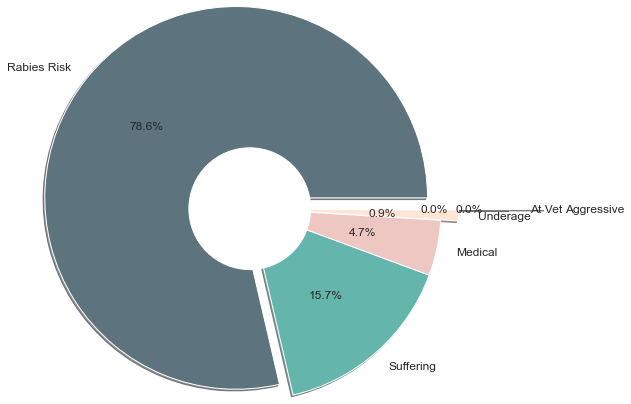

In [431]:
OEuth=Euth[Euth['animal_type']=='Other']
outcome=OEuth.outcome_subtype.value_counts()
labels=outcome.index.to_list()
ax1.axis('equal')
colors = ['#5d737e','#64b6ac','#efc7c2','#ffe5d4','#ff6b6b']
plt.pie(outcome, textprops={"fontsize":12},colors=colors,labels=labels,labeldistance=1.1,radius=2.2,shadow=True,explode = (0.2,0,0,0.2,0.8,1.2),autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

## The majority of the animals in the 'other' category that were euthanized for rabies risk were bats, followed by raccoons, skunks and opossums.

In [432]:
OEuth[OEuth['outcome_subtype']=='Rabies Risk'].breed.value_counts()

Bat Mix         1059
Bat              679
Raccoon Mix      249
Raccoon          117
Skunk Mix         52
Skunk             32
Opossum Mix       22
Fox Mix           21
Fox               10
Squirrel Mix       8
Squirrel           7
Opossum            6
Coyote Mix         4
Coyote             3
Rat Mix            1
Armadillo          1
Name: breed, dtype: int64

# Conclusions 
## Austin's no-kill shelter adopts mostly dogs, followed by cats and other animals. Most animals are adopted when they are between 1-5 years old. Those animals that were euthanized are mostly because they were suffering. Dogs that were put down for aggression were predominantly Pit Bulls or Pit Bull mixes.